# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [9]:
# Run this code:

%matplotlib inline

import matplotlib.pyplot as plt

In [1]:
# Import numpy and pandas:
import numpy as np
import pandas as pd

# Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [31]:
# Run this code
cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [6]:
# Your code here:
cats = np.shape(cats)
cats


(4096, 80)

In [7]:
dogs = np.shape(dogs)
dogs

(4096, 80)

What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [37]:
len(cats[0:,])

4096

In [51]:
cats[:,0].reshape(64,64)

array([[64, 64, 64, ..., 77, 64, 64],
       [64, 64, 64, ..., 77, 64, 64],
       [64, 77, 64, ..., 77, 64, 77],
       ...,
       [64, 64, 64, ..., 64, 64, 61],
       [64, 64, 64, ..., 64, 64, 61],
       [61, 61, 61, ..., 64, 64, 61]], dtype=int64)

In [41]:
#print(cats[0])
print(cats[0:])

[[ 64  23 250 ...  60 223 101]
 [ 64  23 250 ...  50 224 107]
 [ 64  20 250 ...  63 225 106]
 ...
 [ 64  31 244 ... 105 180 114]
 [ 64  23 232 ... 118 182  91]
 [ 61   9 244 ... 104 177 113]]


In [56]:
dogs[:,0].reshape(64,64)

array([[224, 224, 224, ...,  11,  11,  19],
       [224, 224, 224, ...,   8,   8,  11],
       [224, 224, 224, ...,   8,  11,  11],
       ...,
       [213, 213, 204, ..., 106, 106, 106],
       [193, 193, 204, ..., 106, 106, 100],
       [193, 193, 193, ..., 100, 100, 100]], dtype=int64)

Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

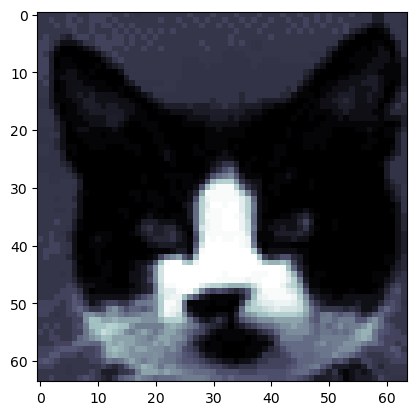

In [60]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(cats[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

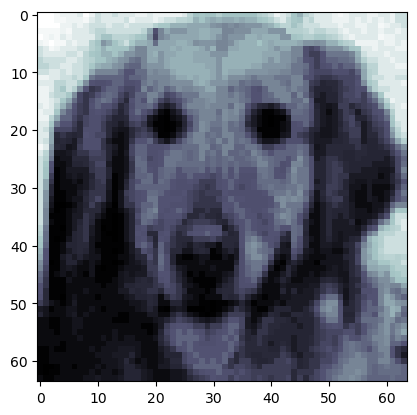

In [61]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(dogs[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

Hint: To find the mean and standard deviation of each image, use `numpy`'s version of mean and stadnard deviation and use `axis=0`.

Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [68]:
# Your code here:
print("\nmean of dogs, axis = 0 : ", np.mean(dogs, axis = 0)) 


mean of dogs, axis = 0 :  [ 86.87036133 153.08520508  89.57641602 139.72192383 107.21875
 110.53344727 145.91333008 129.62426758 100.31518555 111.27929688
 113.30200195  86.80859375 156.45678711  74.37402344 115.13525391
 105.3894043  100.39916992 124.72558594  98.86450195  86.07519531
  92.5012207  123.43237305  75.37109375 160.19702148 148.74169922
 151.13037109  71.95288086 108.87255859  98.92504883 147.12084961
 126.89355469 154.64526367 119.2824707  176.171875   145.37915039
 144.5625      92.09887695 159.39038086 166.60107422 147.01123047
 132.97436523 102.68286133 175.25024414 152.51489258 136.30737305
 136.74975586 143.38769531 156.63818359 117.11816406 157.01293945
 116.62890625  63.30932617  53.11645508 101.4765625  127.13842773
 100.30419922 110.2265625  122.6628418  116.25756836 108.06518555
 125.9387207  114.57177734 137.43823242  83.06494141 182.51611328
 143.42382812  85.41186523 111.20800781 143.25927734 117.7902832
 150.36206055 147.27270508 114.65332031 159.74584961 

In [69]:
print("\nmean of cats, axis = 0 : ", np.mean(cats, axis = 0)) 


mean of cats, axis = 0 :  [ 58.60961914 105.92651367  76.70654297  75.40576172  68.93774414
 124.59277344  81.84619141  98.37060547 128.23486328 138.37109375
 131.01000977 170.98510742 141.52563477  85.37011719 125.72973633
 114.515625   118.96118164  84.36132812  86.71630859 158.82299805
  53.68920898 130.87109375 152.79003906 169.81323242  66.42626953
 122.22705078  84.70336914 173.52294922 124.28417969 109.91650391
  89.74658203  71.20239258  93.21337891  58.1550293  117.23413086
 180.37719727  98.83837891 143.53344727 136.16748047  43.03051758
 137.52270508  69.82495117 141.43164062 170.62817383 174.93212891
 187.10913086 189.74609375 154.75366211 121.72998047 101.93725586
  68.96020508 106.49291992 114.39868164 143.00195312 157.80444336
 116.49731445 103.53881836 122.97924805 119.79345703 157.18652344
 131.90185547  88.17553711  81.78369141 138.07592773 138.16577148
 118.41040039 103.95532227  86.4074707  130.89404297 153.68603516
 118.29077148 115.99633789  97.88745117 111.52514

In [73]:
# Your code here:
X=np.concatenate((dogs, cats), axis=1)

Standardize the concatenated array below.

# Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

Load the `PCA` function from `statsmodels` (read about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html)) and apply the function to our standarized data. Create a PCA model with two components.

In [75]:
from statsmodels.multivariate.pca import PCA

Use `numpy` to find to transpose the standardized pet array. This will help us compute the projection.

In [77]:
x = np.random.randn(100)[:, None]
x = x + np.random.randn(100, 100)
pca = PCA(x)

Find the dot product of the transposed standardized pet matrix and the `factors` of the `PCA` model found above. This will be the projection onto 2 dimensions. This means that each cat and dog image will now only have two columns instead of 4096.

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [81]:
#extra
print(pca.explained_variance_ratio_)

[0.18931712 0.124659  ]


In [82]:
#extra
print(pca.singular_values_)

[20607.84512546 16722.43240495]


# Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

In [83]:
# Your code here:
import pandas as pd

In [89]:
df = pd.DataFrame(x, columns = ['pc1','pc2']*50)
df

,pc1,pc2,pc1,pc2,pc1,pc2,pc1,pc2,pc1,pc2,...,pc1,pc2,pc1,pc2,pc1,pc2,pc1,pc2,pc1,pc2
0,-0.437358,1.290517,0.511427,0.044332,-1.139977,0.000547,0.596032,2.664650,0.258723,0.260967,...,1.523879,1.110212,1.634142,1.958101,1.723468,-0.484631,0.478861,2.147923,1.931770,0.651300
1,1.138270,-0.965873,-2.134932,-0.513542,-2.283144,-1.247071,-0.983336,-0.226178,-2.819795,0.326365,...,-2.345990,-1.525427,-0.348776,-1.133629,-3.332228,1.998233,-0.518787,-0.366352,-1.021805,0.205544
2,-0.201179,0.098477,-0.479558,-1.019767,-2.119679,-0.955619,-0.437190,-0.341428,0.432611,-0.397840,...,-1.155137,-3.179305,0.387125,-2.072877,-1.167308,-0.996315,-0.819359,-1.649981,-1.145152,0.348002
3,0.581872,0.800243,0.969557,2.785288,0.126539,1.692553,-0.171553,0.798787,-0.278546,1.813436,...,0.963982,1.057341,2.647685,1.234993,-1.412386,3.292077,1.519594,2.767031,0.871044,0.310506
4,-2.300485,-1.325663,0.287979,0.976711,1.231229,1.791799,-0.595873,1.177040,0.357614,-0.702410,...,-0.302027,0.096741,-0.461720,-0.227632,0.800693,-0.695437,0.153148,-0.267935,0.026202,1.161497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.811021,0.249612,2.392355,1.621131,1.466781,0.829431,0.262024,0.834264,2.471171,2.189011,...,2.414579,2.174726,1.449855,2.719603,0.919780,1.038086,2.764368,0.772648,1.008472,2.558038
96,-0.238576,0.609684,2.408226,0.773532,-0.640118,1.159919,-0.735214,-0.166594,0.188941,-0.013534,...,-0.422938,1.620670,0.518870,0.480584,-1.421698,0.692429,0.072525,-0.356713,-0.148805,1.177832
97,0.566763,0.590487,-0.581761,0.104871,0.373293,1.230506,-2.926138,1.014488,-0.484917,-0.059281,...,0.948443,0.004279,-0.217545,-0.247162,1.735350,0.244003,1.126859,0.799959,-0.295721,1.825675
98,-0.356543,-0.018993,-0.330169,-0.019038,-1.850712,0.087804,0.077471,0.047025,1.929911,0.487250,...,-0.123934,0.578338,0.112666,-1.407656,-0.818292,-0.197755,0.505281,-0.048904,-0.301376,1.246569


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [16]:
#don't know. this is 100*100


Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

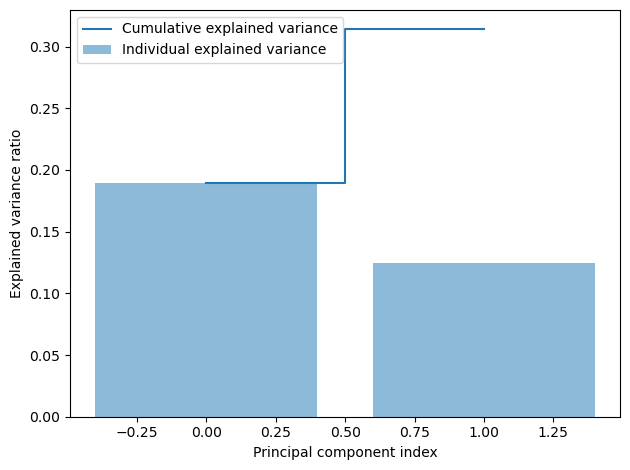

In [90]:
import matplotlib.pyplot as plt

plt.scatter(pc1, pc2)
plt.show()


Do you see a clear separation between cats and dogs? Write your answer below.

In [18]:
# Your conclusions here:

